# Gradient Descent - Lab

## Introduction

In this lab, you'll continue to formalize your knowledge of gradient descent by coding the algorithm yourself. In the upcoming labs, you'll apply similar procedures to implement logistic regression on your own.


## Objectives

In this lab you will: 


- Implement gradient descent from scratch to minimize OLS


## Use gradient descent to minimize OLS

To practice gradient descent, you'll investigate a simple regression case in which you're looking to minimize the Residual Sum of Squares (RSS) between the predictions and the actual values. Remember that this is referred to as Ordinary Least Squares (OLS) regression. You'll compare two simplistic models and use gradient descent to improve upon these initial models.


## Load the dataset

- Import the file `'movie_data.xlsx'` using Pandas 
- Print the first five rows of the data 

> You can use the `read_excel()` function to import an Excel file. 

In [1]:
# Import the data
import pandas as pd
df = pd.read_excel('movie_data.xlsx')

# Print the first five rows of the data
df.head()

,budget,domgross,title
0,13000000,25682380,21 &amp; Over
1,45658735,13414714,Dredd 3D
2,20000000,53107035,12 Years a Slave
3,61000000,75612460,2 Guns
4,40000000,95020213,42


In [2]:
df.shape

(30, 3)

## Two simplistic models

Imagine someone is attempting to predict the domestic gross sales of a movie based on the movie's budget, or at least further investigate how these two quantities are related. Two models are suggested and need to be compared.  
The two models are:  

$\text{domgross} = 1.575 \cdot \text{budget}$  
$\text{domgross} = 1.331 \cdot \text{budget}$  


Here's a graph of the two models along with the actual data:

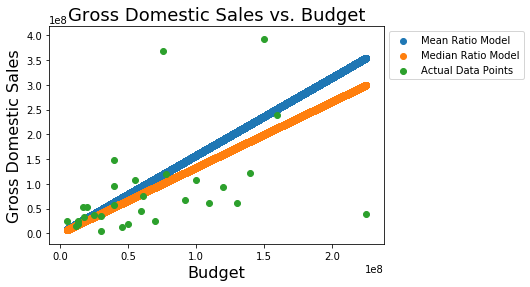

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(start=df['budget'].min(), stop=df['budget'].max(), num=10**5)
plt.scatter(x, 1.575*x, label='Mean Ratio Model') # Model 1
plt.scatter(x, 1.331*x, label='Median Ratio Model') # Model 2
plt.scatter(df['budget'], df['domgross'], label='Actual Data Points')
plt.title('Gross Domestic Sales vs. Budget', fontsize=18)
plt.xlabel('Budget', fontsize=16)
plt.ylabel('Gross Domestic Sales', fontsize=16)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

## Error/Loss functions

To compare the two models (and future ones), a metric for evaluating and comparing models to each other is needed. Traditionally, this is the residual sum of squares. As such you are looking to minimize  $ \sum(\hat{y}-y)^2$.
Write a function `rss()` which calculates the residual sum of squares for a simplistic model: 

$\text{domgross} = m \cdot \text{budget}$ 

In [4]:
def rss(m, X=df['budget'], y=df['domgross']):
    if len(X) != len(y):
        print('ca va pas!')
    
    squares_df=pd.DataFrame(X).copy()
    squares_df['domgross'] = y.values
    squares_df['squares']=(m*df.budget-df.domgross)**2
    return np.sum(squares_df.squares)

In [5]:
X=df['budget']
y=df['domgross']
m=1
rss(m,X,y)

222288260290116585

In [6]:
X=df['budget']
y=df['domgross']
XX=pd.DataFrame(X)
type(X), type(XX)

# y.values
# squares_df=X.copy()
# # squares_df['domgross']=y.values
# squares_df.columns()


# # dfg=pd.DataFrame(y.values)
# # dfg
# # print(len(X),len(y))
# # rss(1,X,y)


(pandas.core.series.Series, pandas.core.frame.DataFrame)

## Find the RSS for the two models
Which of the two models is better?

In [7]:
# Your code here
X=df['budget']
y=df['domgross']
m=1.575
rss(m,X,y)

2.7614512142376128e+17

In [8]:
# Your response here
X=df['budget']
y=df['domgross']
m=1.331
rss(m,X,y)

2.3547212057814554e+17

In [9]:
# The 1.331 is a bit better


## Gradient descent

Now that you have a loss function, you can use numerical methods to find a minimum to the loss function. By minimizing the loss function, you have achieved an optimal solution according to the problem formulation. Here's the outline of gradient descent from the previous lesson:  

1. Define initial parameters:
    1. pick a starting point
    2. pick a step size $\alpha$ (alpha)
    3. choose a maximum number of iterations; the algorithm will terminate after this many iterations if a minimum has yet to be found
    4. (optionally) define a precision parameter; similar to the maximum number of iterations, this will terminate the algorithm early. For example, one might define a precision parameter of 0.00001, in which case if the change in the loss function were less than 0.00001, the algorithm would terminate. The idea is that we are very close to the bottom and further iterations would make a negligible difference 
2. Calculate the gradient at the current point (initially, the starting point)
3. Take a step (of size alpha) in the direction of the gradient
4. Repeat steps 2 and 3 until the maximum number of iterations is met, or the difference between two points is less then your precision parameter  

To start, visualize the cost function. Plot the cost function output for a range of m values from -3 to 5.

[-3, -2, -1, 0, 1, 2, 3, 4, 5]


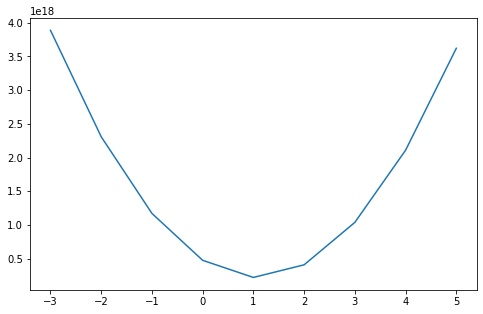

In [10]:
# Your code here
# cost function: m -> rss(m,X,y)

import matplotlib.pyplot as plt

m= range(-3,6)
print(list(m))
rss_plot=[rss(i,X,y) for i in m]
rss_plot
fig=plt.figure(figsize=(8,5))
plt.plot(m,rss_plot)

As you can see, this is a simple cost function. The minimum is clearly around 1. With that, it's time to implement gradient descent in order to find the optimal value for m.

In [11]:
rss(2)

409720103894263680

In [26]:
# Set a starting point
cur_x = 2

# Initialize a step size
alpha = .0000001

# Initialize a precision
precision = 0.00000001 

# Helpful initialization
previous_step_size = 1 

# Maximum number of iterations
# max_iters = 10000
max_iters = 100

# Iteration counter
iters = 0 

# Create a loop to iterate through the algorithm until either the max_iteration or precision conditions is met
# Your code here; create a loop as described above

#update for rss
update_rss =.1

while iters < max_iters and update_rss > precision:
    
    previous_x = cur_x
    
    # Calculate the gradient. This is often done by hand to reduce computational complexity.
    # For here, generate points surrounding your current state, then calculate the rss of these points
    # Finally, use the np.gradient() method on this survey region. 
    # This code is provided here to ease this portion of the algorithm implementation
    
    x_survey_region = np.linspace(start = cur_x - previous_step_size , stop = cur_x + previous_step_size , num = 101)
    rss_survey_region = [np.sqrt(rss(m)) for m in x_survey_region]
    gradient = np.gradient(rss_survey_region)[50] 
    
    # Update the current x, by taking an "alpha sized" step in the direction of the gradient
    cur_x = cur_x - gradient*alpha    
    previous_step_size = np.abs(gradient*alpha)
    update_rss=np.abs(rss(cur_x)-rss(previous_x)) 
    
    # Update the iteration number
    iters+=1
    print ('iters', iters)
    print ('cur_x', cur_x)
    print ('rss', rss(cur_x),'\n')
    

# The output for the above will be: ('The local minimum occurs at', 1.1124498053361267)    
# print("The local minimum occurs at", cur_x)

iters 1
cur_x 1.3625339148979663
rss 2.3925039570684944e+17 

iters 2
cur_x 1.1973265544857115
rss 2.2432822720963328e+17 

iters 3
cur_x 1.1785348669362365
rss 2.2339375102007805e+17 

iters 4
cur_x 1.1767225876489191
rss 2.2331186804627146e+17 

iters 5
cur_x 1.1765508453440219
rss 2.2330418350888915e+17 

iters 6
cur_x 1.1765345972896337
rss 2.2330345717042134e+17 

iters 7
cur_x 1.1765330603511215
rss 2.233033884705297e+17 

iters 8
cur_x 1.1765329149709731
rss 2.2330338197221024e+17 

iters 9
cur_x 1.1765329012193768
rss 2.2330338135753075e+17 

iters 10
cur_x 1.1765328999186098
rss 2.2330338129938806e+17 

iters 11
cur_x 1.176532899795568
rss 2.2330338129388822e+17 

iters 12
cur_x 1.176532899783933
rss 2.2330338129336816e+17 

iters 13
cur_x 1.1765328997828304
rss 2.2330338129331888e+17 

iters 14
cur_x 1.1765328997827291
rss 2.2330338129331437e+17 

iters 15
cur_x 1.1765328997827202
rss 2.2330338129331392e+17 

iters 16
cur_x 1.1765328997827174
rss 2.2330338129331382e+17 

iter

In [31]:
# Set a starting point
cur_x = 2
previous_x=cur_x
# Initialize a step size
alpha = .0000001
# Initialize a precision
precision = 0.00000001 
# Helpful initialization
previous_step_size = 1 
# Maximum number of iterations
max_iters = 100
# Iteration counter
iters = 0 
#update for rss
update_rss =.1
#lower limit for x step size. If I don't do that, step size becomes too small too quick. 
min_step_size=.1

# Create a loop to iterate through the algorithm until either the max_iteration or precision conditions is met
# Your code here; create a loop as described above
while iters < max_iters and update_rss > precision:
    
    previous_x = cur_x
    
    # Calculate the gradient. This is often done by hand to reduce computational complexity.
    # For here, generate points surrounding your current state, then calculate the rss of these points
    # Finally, use the np.gradient() method on this survey region. 
    # This code is provided here to ease this portion of the algorithm implementation
    
    x_survey_region = np.linspace(start = cur_x - previous_step_size , stop = cur_x + previous_step_size , num = 101)
    rss_survey_region = [np.sqrt(rss(m)) for m in x_survey_region]
    gradient = np.gradient(rss_survey_region)[50] 
    
    
    # Update the current x, by taking an "alpha sized" step in the direction of the gradient
    previous_x= cur_x
    cur_x = cur_x - gradient*alpha    
    previous_step_size = max( min_step_size, np.abs(gradient*alpha))
    update_rss=np.abs(rss(cur_x)-rss(previous_x)) 
    
    # Update the iteration number
    iters+=1
    print ('iters', iters)
    print('gradient',gradient)
    print('previous_x', previous_x)
    print ('cur_x', cur_x)
    print ('rss', rss(cur_x),'\n')
    

# The output for the above will be: ('The local minimum occurs at', 1.1124498053361267)    
print("The local minimum occurs at", cur_x)

iters 1
gradient 6374660.851020336
previous_x 2
cur_x 1.3625339148979663
rss 2.3925039570684944e+17 

iters 2
gradient 1652073.6041225493
previous_x 1.3625339148979663
cur_x 1.1973265544857115
rss 2.2432822720963328e+17 

iters 3
gradient 187916.87549474835
previous_x 1.1973265544857115
cur_x 1.1785348669362365
rss 2.2339375102007805e+17 

iters 4
gradient 96440.29391404986
previous_x 1.1785348669362365
cur_x 1.1688908375448315
rss 2.2297467554490125e+17 

iters 5
gradient 87518.81240037084
previous_x 1.1688908375448315
cur_x 1.1601389563047944
rss 2.22629888995035e+17 

iters 6
gradient 79401.84516945481
previous_x 1.1601389563047944
cur_x 1.1521987717878488
rss 2.223463216846058e+17 

iters 7
gradient 72022.11094400287
previous_x 1.1521987717878488
cur_x 1.1449965606934485
rss 2.2211317119688096e+17 

iters 8
gradient 65316.603560715914
previous_x 1.1449965606934485
cur_x 1.1384649003373768
rss 2.219215194330239e+17 

iters 9
gradient 59226.68755227327
previous_x 1.1384649003373768
c

iters 70
gradient 145.52404034137726
previous_x 1.075389903928688
cur_x 1.075375351524654
rss 2.2103943657224634e+17 

iters 71
gradient 131.86583974957466
previous_x 1.075375351524654
cur_x 1.075362164940679
rss 2.210394357930871e+17 

iters 72
gradient 119.48953348398209
previous_x 1.075362164940679
cur_x 1.0753502159873307
rss 2.2103943515332077e+17 

iters 73
gradient 108.27480888366699
previous_x 1.0753502159873307
cur_x 1.0753393885064424
rss 2.2103943462800982e+17 

iters 74
gradient 98.11264541745186
previous_x 1.0753393885064424
cur_x 1.0753295772419007
rss 2.2103943419667792e+17 

iters 75
gradient 88.90425479412079
previous_x 1.0753295772419007
cur_x 1.0753206868164213
rss 2.2103943384251206e+17 

iters 76
gradient 80.56012025475502
previous_x 1.0753206868164213
cur_x 1.0753126308043959
rss 2.210394335517071e+17 

iters 77
gradient 72.99912691116333
previous_x 1.0753126308043959
cur_x 1.0753053308917047
rss 2.2103943331292755e+17 

iters 78
gradient 66.14777263998985
previou

In [34]:
t=0
while t<5:
    t+=1
    print(t)

1
2
3
4
5


In [30]:
    x_survey_region = np.linspace(start = 10 - 10 , stop = 10 + 10 , num = 21)
    rss_survey_region = [np.sqrt(rss(m)) for m in x_survey_region]
#     gradient = np.gradient(rss_survey_region)[50] 
    gradient = np.gradient(rss_survey_region)
    print(x_survey_region,type(x_survey_region),len(x_survey_region))
    print(rss_survey_region,type(rss_survey_region),len(rss_survey_region))
    print(gradient,type(gradient),len(gradient))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.] <class 'numpy.ndarray'> 21
[690011852.6877418, 471474559.5364787, 640093824.2900518, 1019024969.1062585, 1452020527.2630823, 1902518140.698876, 2360518349.8432837, 2822371064.2594476, 3286452480.8605943, 3751935678.247177, 4218356634.830329, 4685435305.677969, 5152992843.865956, 5620909751.484853, 6089103181.906581, 6557513905.866752, 7026098464.406143, 7494824252.615169, 7963666333.028418, 8432605308.57431, 8901625865.915989] <class 'list'> 21
[-2.18537293e+08 -2.49590142e+07  2.73775205e+08  4.05963351e+08
  4.41746586e+08  4.54248911e+08  4.59926462e+08  4.62967066e+08
  4.64782307e+08  4.65952077e+08  4.66749814e+08  4.67318105e+08
  4.67737223e+08  4.68055169e+08  4.68302077e+08  4.68497641e+08
  4.68655173e+08  4.68783934e+08  4.68890528e+08  4.68979766e+08
  4.69020557e+08] <class 'numpy.ndarray'> 21


In [17]:
f = np.array([1, 2, 4, 7, 11, 16], dtype=float)
np.gradient(f)


array([1. , 1.5, 2.5, 3.5, 4.5, 5. ])

In [16]:
624539784.4209696-690011852.6877418


-65472068.26677215

In [18]:
567127785.7821432-624539784.4209696


-57411998.63882637

In [20]:
f = np.array([1, 2, 3, 4, 5, 7], dtype=float)
np.gradient(f)

array([1. , 1. , 1. , 1. , 1.5, 2. ])

In [24]:
f = np.array([1,  2,  3,   4,   5,  6], dtype=float)
x = np.array([0,  1,  2,   3,   4,  5], dtype=float)
np.gradient(f,x)

array([1., 1., 1., 1., 1., 1.])

In [25]:
f = np.array([1,  2,  3,   4,   5,  6], dtype=float)
x = np.array([0,  1,  2,   4,   5,  6], dtype=float)
np.gradient(f,x)

array([1.        , 1.        , 0.83333333, 0.83333333, 1.        ,
       1.        ])

In [26]:
(4-2)/3

0.6666666666666666

In [27]:
(4-2)/0.833333333

2.40000000096

#### Plot the minimum on your graph
Replot the RSS cost curve as above. Add a red dot for the minimum of this graph using the solution from your gradient descent function above.

[-3, -2, -1, 0, 1, 2, 3, 4, 5]


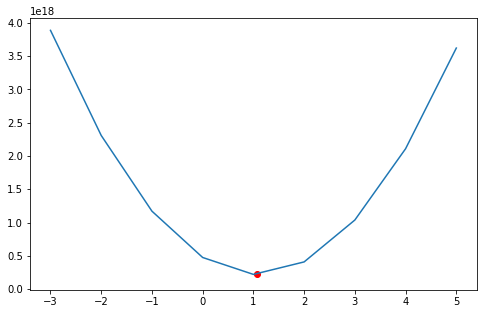

In [34]:
# Your code here
m= range(-3,6)
print(list(m))
rss_plot=[rss(i,X,y) for i in m]
rss_plot
fig=plt.figure(figsize=(8,5))
plt.plot(m,rss_plot)
plt.scatter(cur_x,rss(cur_x),c='red')

## Summary 

In this lab, you coded up a gradient descent algorithm from scratch! In the next lab, you'll apply this to logistic regression in order to create a full implementation yourself!